In [12]:
import pandas as pd

#read dataframe from pickle
baseline_path = "../../partition/sample_data/baseline_after_neck.pkl"
baseline_df = pd.read_pickle(baseline_path)
baseline_df = baseline_df[0]

#read dataframe from pickle
poolformer_path = "../../partition/sample_data/poolformer_after_neck.pkl"
poolformer_df = pd.read_pickle(poolformer_path)
poolformer_df = poolformer_df[0]


In [13]:
baseline_df.keys()

dict_keys(['hm', 'scores', 'labels', 'order', 'mask', 'BEV_feat', 'H', 'W', 'ct_feat'])

In [16]:
import torch

for key, value in baseline_df.items():
    if isinstance(value, torch.Tensor):
        print(f"{key}: {value.shape}")

hm: torch.Size([1, 1, 360, 360])
scores: torch.Size([1, 500])
labels: torch.Size([1, 500])
order: torch.Size([1, 500])
mask: torch.Size([1, 500])
BEV_feat: torch.Size([1, 256, 360, 360])
ct_feat: torch.Size([1, 256, 500])


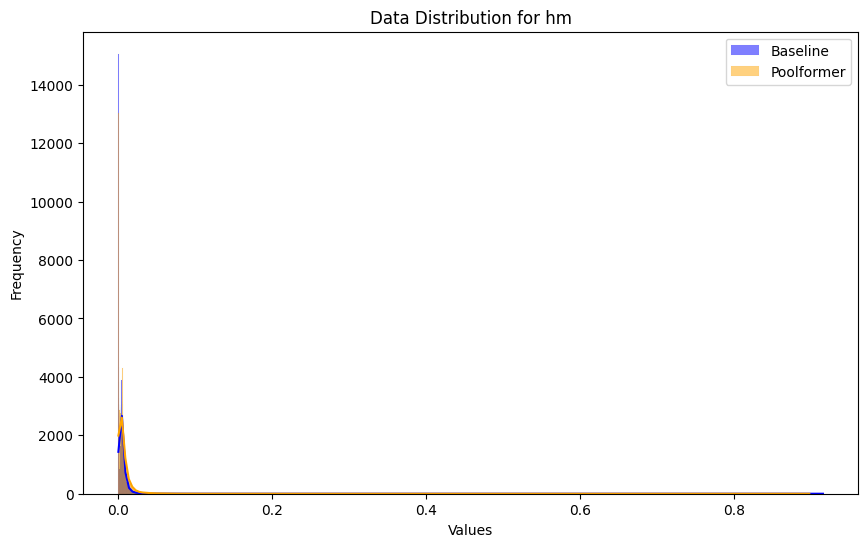

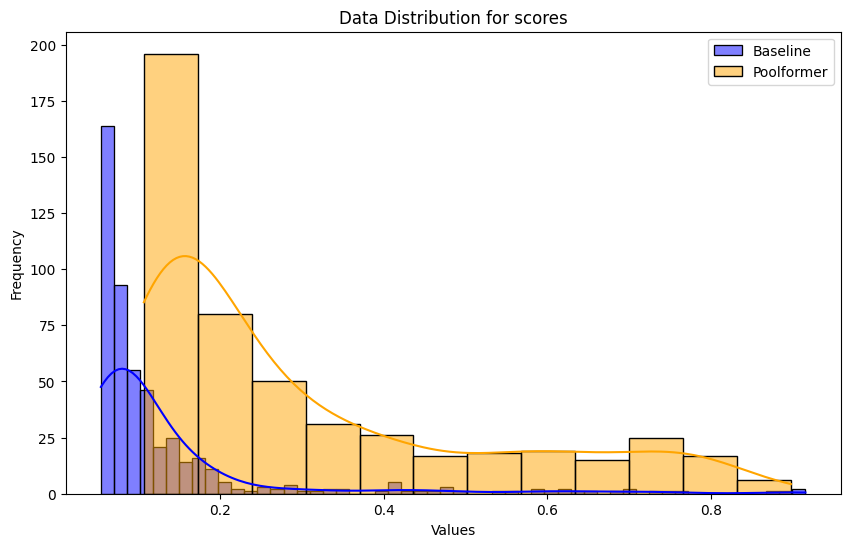

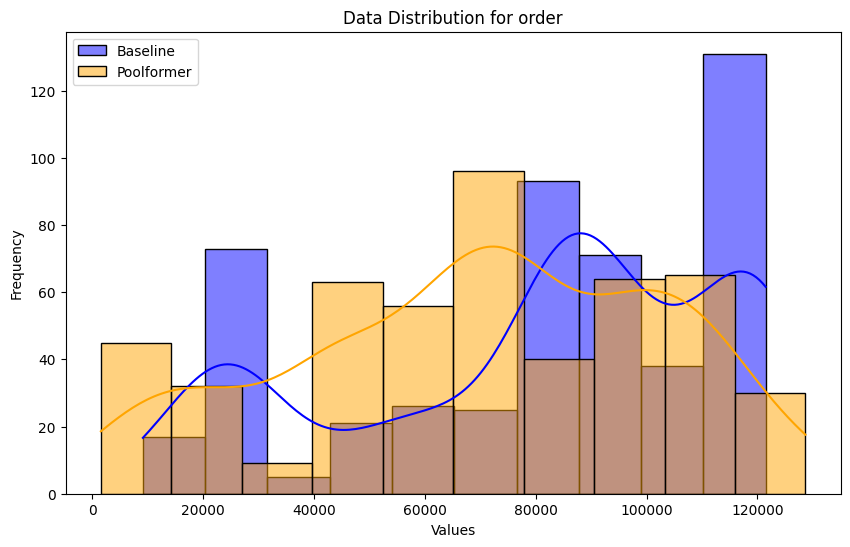

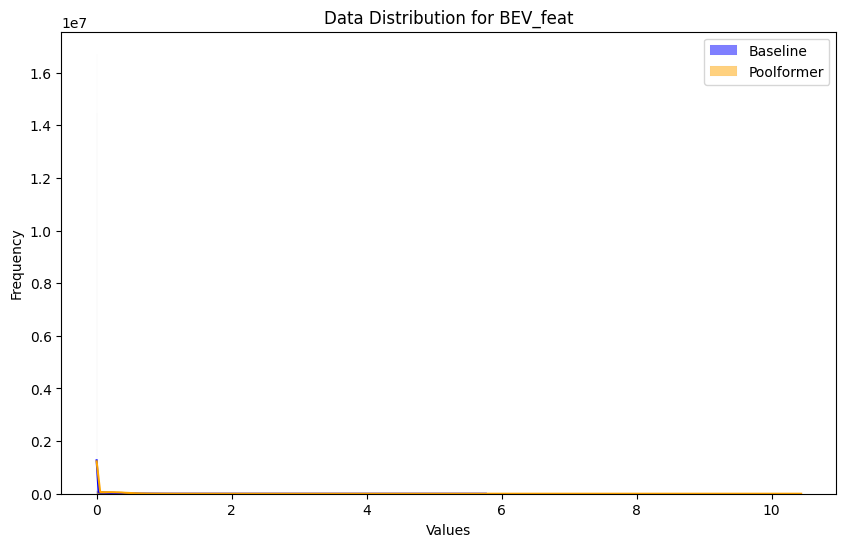

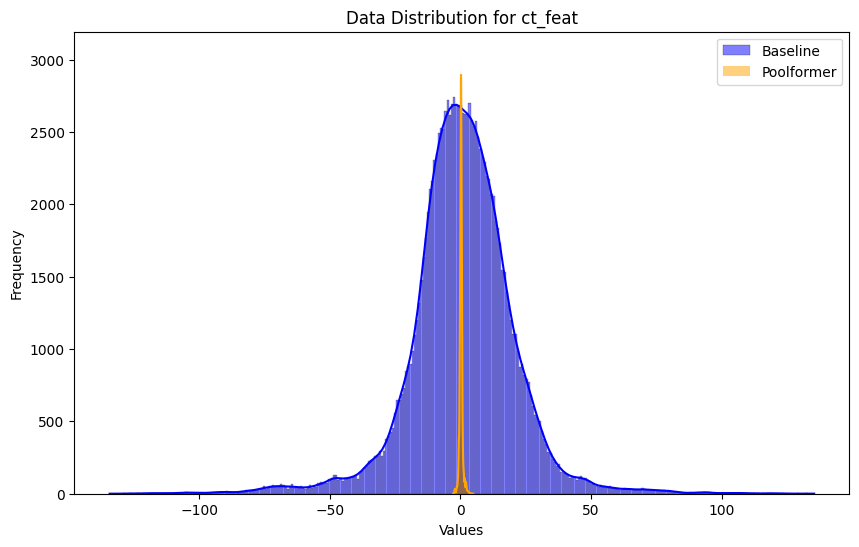

In [20]:
# plot data distribution
import matplotlib.pyplot as plt
import seaborn as sns

for key in baseline_df.keys():
    baseline_value = baseline_df[key]
    poolformer_value = poolformer_df[key]
    
    if isinstance(baseline_value, torch.Tensor) and key not in ['mask', 'labels']:
        plt.figure(figsize=(10, 6))
        # Plot baseline_value
        sns.histplot(baseline_value.cpu().numpy().flatten(), kde=True, label='Baseline', color='blue')
        # Plot poolformer_value
        sns.histplot(poolformer_value.cpu().numpy().flatten(), kde=True, label='Poolformer', color='orange')
        
        plt.title(f'Data Distribution for {key}')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()